<Figure size 640x480 with 0 Axes>

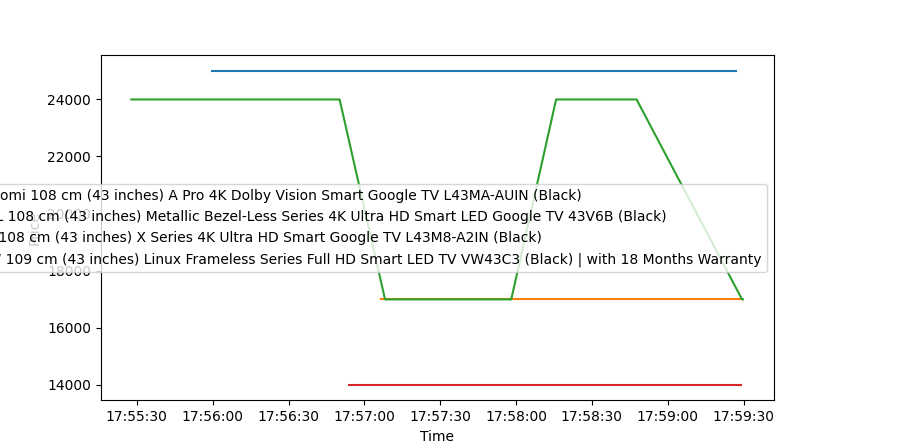

<Figure size 640x480 with 0 Axes>

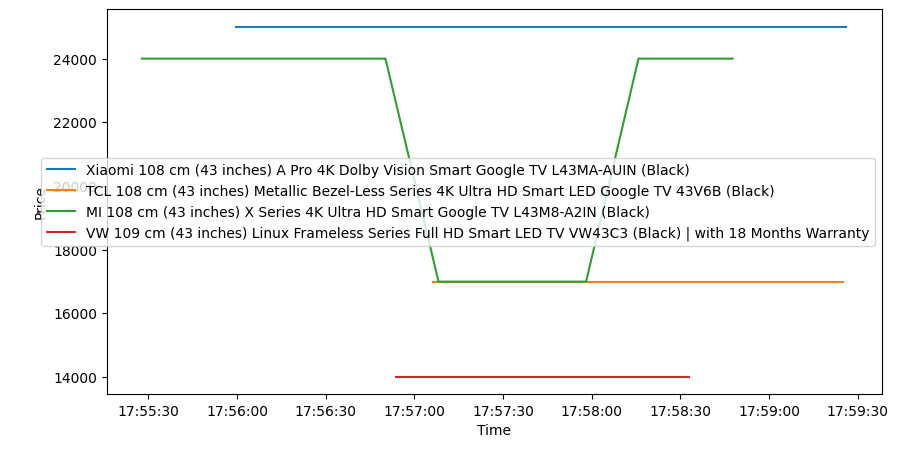

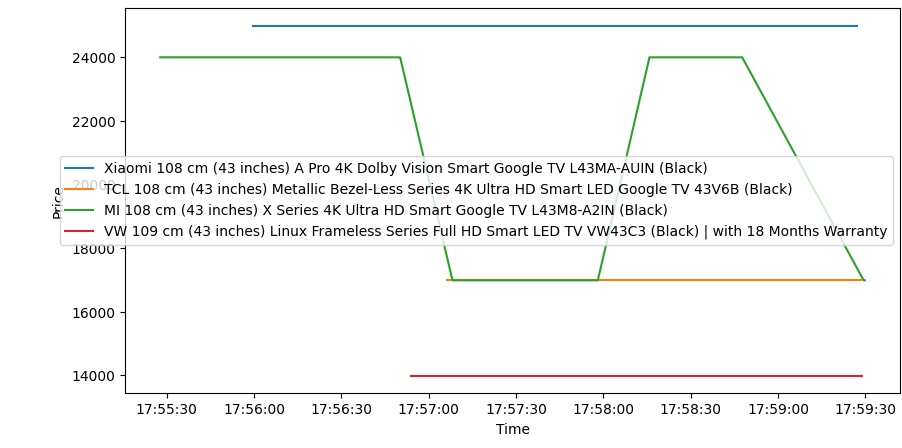

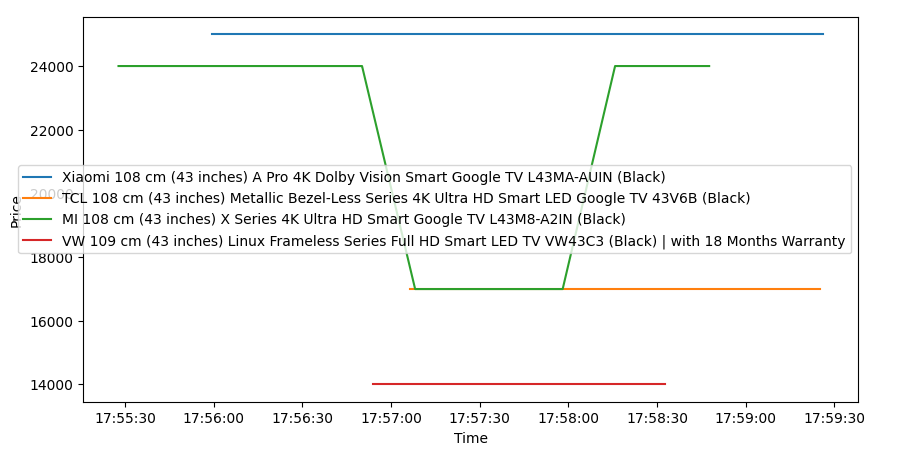

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from datetime import datetime
import time
import threading

# Install required libraries
!pip install requests beautifulsoup4 pandas ipywidgets matplotlib

# Define scraping function
def scrape_price(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Modify this part based on the structure of the target website
    try:
        price = soup.find('span', {'class': 'a-price-whole'}).text
        price = price.replace(',', '')  # Remove comma if present
        return float(price)
    except AttributeError:
        return None
# Test the scraping function with a known URL
url = "https://www.amazon.com/dp/B07FZ8S74R/" # Replace with a real product URL
price = scrape_price(url)
print(f"Scraped price: {price}")


# Define functions for GUI
products = {}
prices = {}

def add_product(product_name, product_url):
    if product_name in products:
        print("Product already added!")
    else:
        products[product_name] = product_url
        prices[product_name] = []
        print(f"Added {product_name}")

def display_prices():
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    for product, price_list in prices.items():
        if price_list:
            dates, price_values = zip(*price_list)
            plt.plot(dates, price_values, label=product)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    display(plt.gcf())
    plt.close()

def update_prices():
    while True:
        for product, url in products.items():
            try:
                price = scrape_price(url)
                if price is not None:
                    prices[product].append((datetime.now(), price))
                    print(f"{product}: ${price}")
            except Exception as e:
                print(f"Error scraping {product}: {e}")
        display_prices()
        time.sleep(3600)  # Update every hour

def start_monitoring():
    thread = threading.Thread(target=update_prices)
    thread.start()

# Create GUI widgets
product_name_input = widgets.Text(
    value='',
    placeholder='Enter product name',
    description='Product Name:',
    disabled=False
)

product_url_input = widgets.Text(
    value='',
    placeholder='Enter product URL',
    description='Product URL:',
    disabled=False
)

add_button = widgets.Button(
    description='Add Product',
    disabled=False,
    button_style='',
    tooltip='Click to add product',
    icon='plus'
)

start_button = widgets.Button(
    description='Start Monitoring',
    disabled=False,
    button_style='success',
    tooltip='Click to start monitoring prices',
    icon='play'
)

def on_add_button_clicked(b):
    product_name = product_name_input.value
    product_url = product_url_input.value
    add_product(product_name, product_url)
    product_name_input.value = ''
    product_url_input.value = ''

add_button.on_click(on_add_button_clicked)

def on_start_button_clicked(b):
    start_monitoring()

start_button.on_click(on_start_button_clicked)

# Display widgets
display(product_name_input, product_url_input, add_button, start_button)
